<a href="https://colab.research.google.com/github/Carolinefcg/vendas_em_python/blob/main/Caroline_Ferreira01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [185]:
# Caroline Ferreira
# 119054035

# Utlizando a biblioteca pandas para os graficos
import pandas as pd
# Utlizando a biblioteca io para manipular string e bytes
import io

# 1 _ CARREGANDO DADOS

# Chamando o PyDrive, responsavel
# por fazer a conexão entre o Google Drive e Python:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Autenticação e criação  do cliente PyDrive 
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Local onde se encontra o arquivo Dados1.csv
link = 'https://drive.google.com/open?id=1IihVCe1n8ocK8B2SB-uIvZ9qGMln_KZy'

# Note que apenas o que está depois do 
# sinal de '=' é o id, o endereço de Dados1.csv
fluff, id = link.split('=')

# Pegando o conteúdo do arquivo
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Dados1.csv')  

# Utilizando o delimatador mencionado
# Chamando o conteudo de Dados1.csv de df, abreviação 
# para dataframe 
df = pd.read_csv('Dados1.csv', delimiter=";")

# Dataset agora esta no Pandas Dataframe

# Visualizando o dataframe

print(df)


     t  dNf
0    0  423
1    1  223
2    2  122
3    3   76
4    4   60
5    5   49
6    6   40
7    7   33
8    8   28
9    9   22
10  10   18
11  11   15
12  12   12
13  13   10
14  14   11
15  15   10
16  16    9
17  17    7
18  18    4
19  19    2
20  20    1


In [186]:
# 2 _ MANIPULANDO DADOS

# Função sum faz a soma de todos os valores
# da coluna 2 do dataframe, identificada por df['dNf']
soma_total = sum(df['dNf'])

# Criando uma nova variavel somas como um vetor
somas = []

# Para cada linha na coluna 2 do data frame
# faremos a divisão dela pela soma total da coluna 2
# O comando .append() é responsável por armazenar
# esses novos valores no vetor somas

for linha in df['dNf']:
  somas.append(linha/soma_total)

# Criando uma nova coluna no dataframe
# Podemos interpretar as operações feitas
# como a frequência relativa, portanto:

df['freq. relativa'] = somas

# Criando um novo vetor
acumulado = []

# Guardando na 1ª posição desse vetor 
# o 1º valor da 3ª coluna do dataframe
acumulado.append(somas[0])

# Cada linha no vetor acumulado é a soma das
# linhas anteriores da 3ª coluna 

# Repare que o loop do for começa no 1 e acumulado[i-1]
# onde (i-1) em conjunto com o loop do for permite
# inserir valores a partir da 2ª posição
# do vetor 'acumulado' e depois acumulamos todos os anteriores

for i in range(1,len(somas)):
  acumulado.append(somas[i]+acumulado[i-1])

# Criando uma nova coluna no dataframe com 
# o vetor acumulado que pode ser interpretado
# como a frequência acumulada

df['freq. acumulada'] = acumulado

# Visualizando o dataframe com todas
# as modificações feitas

print(df)

     t  dNf  freq. relativa  freq. acumulada
0    0  423        0.360000         0.360000
1    1  223        0.189787         0.549787
2    2  122        0.103830         0.653617
3    3   76        0.064681         0.718298
4    4   60        0.051064         0.769362
5    5   49        0.041702         0.811064
6    6   40        0.034043         0.845106
7    7   33        0.028085         0.873191
8    8   28        0.023830         0.897021
9    9   22        0.018723         0.915745
10  10   18        0.015319         0.931064
11  11   15        0.012766         0.943830
12  12   12        0.010213         0.954043
13  13   10        0.008511         0.962553
14  14   11        0.009362         0.971915
15  15   10        0.008511         0.980426
16  16    9        0.007660         0.988085
17  17    7        0.005957         0.994043
18  18    4        0.003404         0.997447
19  19    2        0.001702         0.999149
20  20    1        0.000851         1.000000


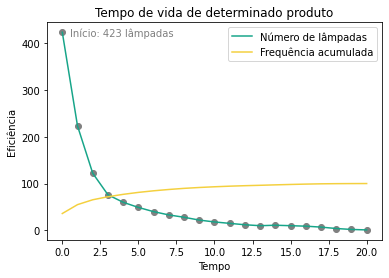

In [187]:
# 3 _ GRAFICOS

# importando a biblioteca para utilizar os fraficos
import matplotlib.pyplot as plt

# Irá armazenar os gráficos gerados neste notebook
%matplotlib inline

# RELAÇÃO ENTRE O TEMPO E dNf - GRÁFICO 1

# 1ª linha do grafico e definição dos eixos
# Eixos: df['t'] e df['dNf']
# Também é definida a cor e a legenda
plt.plot(df['t'], df['dNf'], color='#17a589', label = 'Número de lâmpadas')

# 2ª linha do grafico
# Note que os valores na coluna 'freq. acumulada' 
# são bem pequenos se comparados aos da coluna 'dNf'
# portando, para fins representativos, ela foi multiplicada por 100
# sem perder o seu valor de percentual

plt.plot(df['t'], df['freq. acumulada']*100, color='#f4d03f', label = 'Frequência acumulada')

# Titulo do grafico 1
plt.title('Tempo de vida de determinado produto')

# Nomeando os eixos
plt.xlabel('Tempo')

plt.ylabel('Eficiência')

# Utilizando os pontos para visualizar melhor
# quais são os valores da coluna 'dNf'
plt.scatter(df['t'], df['dNf'], color='gray')

# Criando uma anotação no grafico

# Definindo a cor e o tamanho
style = dict(size=10, color='gray')

# Transformando uma informação numérica em texto
texto1 = 'Início: '+str(df['dNf'][0])+' lâmpadas'

# Aplicando ao gráfico no lugar desejado
plt.text(0.5, df['dNf'][0]-8, texto1, **style)

plt.legend()

# Exibindo o gráfico
plt.show()


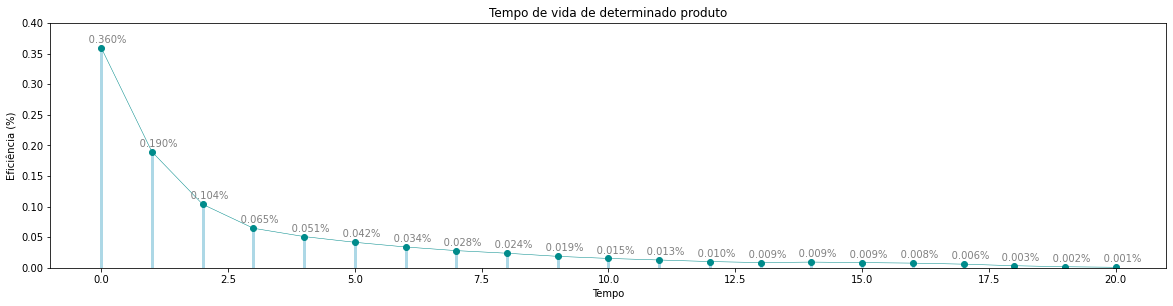

In [195]:
# RELACAO ENTRE O TEMPO E FREQ. RELATIVA - GRAFICO 2

# Importando a biblioteca numpy para
import numpy as np

# RELACAO ENTRE O TEMPO E FREQ. RELATIVA - GRAFICO 2

# Utilizaremos o grafico de stemlines ('linhas de base')

# Há 3 componentes principais, os marcadores, as
# linhas de base e a base fixa
# Em basefmt=" ", retiramos essa base fixa 
(markers, stemlines, baseline) = plt.stem(df['t'], df['freq. relativa'], basefmt=" ", use_line_collection=True) 

# Definimos as cor das linhas, a forma das linhas,  e a sua amplitude
plt.setp(stemlines, linestyle="-", color="lightblue", linewidth=3)

# Agora, os marcadores estao com a sua cor e amplitude definidos
plt.setp(markers, linestyle="-", color="darkcyan", linewidth=0.5)

# Titulo do grafico
plt.title('Tempo de vida de determinado produto')

# Rotulando os eixos
plt.xlabel('Tempo')

plt.ylabel('Eficiência (%)')


# Definindo a cor e o tamanho
style = dict(size=10, color='gray')

# Visualizando o valor de cada linha
# da coluna de frequência acumulada


# Repare que df['t'][k]-0.55 não altera o valor exibido
# apenas o coloca o texto em uma melhor posição no gráfico

for k in range(0, len(df['freq. relativa'])):
     texto2 = str("{:10.3f}".format(df['freq. relativa'][k]))+'%'
     plt.text(df['t'][k]-0.55, df['freq. relativa'][k]+0.008, texto2, **style)

# Redimensionando o grafico
plt.rcParams["figure.figsize"] = [20, 4.5]

# Mudando o limite do eixo y para uma melhor visualização
plt.ylim(0,0.4) 

plt.show()

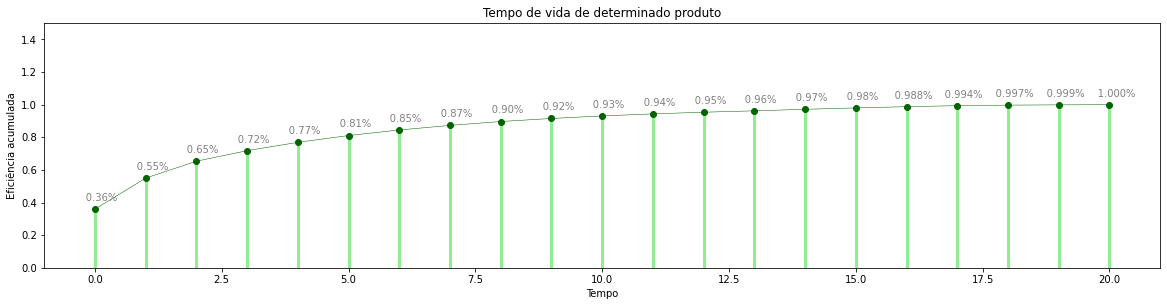

In [198]:
# RELACAO ENTRE O TEMPO E FREQ. ABSOLUTA - GRAFICO 3

(markers, stemlines, baseline) = plt.stem(df['t'], df['freq. acumulada'], basefmt=" ", use_line_collection=True)

plt.setp(stemlines, linestyle="-", color="lightgreen", linewidth=3)

plt.setp(markers, linestyle="-", color="darkgreen", linewidth=0.5)

plt.title('Tempo de vida de determinado produto')

plt.xlabel('Tempo')

plt.ylabel('Eficiência (%) acumulada')


# Nessas anotações, quando a porcentagem fica tão próximo de 1
# perde-se um pouco de informação ao usar somentes 2 casas
# decimais, portanto estabelecemos um parâmetro, se for
# >= 0.99, será exibido com 3 casas decimais

for k in range(0, len(df['freq. acumulada'])):
  if float("{:10.2f}".format(df['freq. acumulada'][k])) >= 0.99:
    texto1 = str("{:10.3f}".format(df['freq. acumulada'][k]))+'%'
    plt.text(df['t'][k]-0.55, df['freq. acumulada'][k]+0.05, texto1, **style)
  else:
     texto2 = str("{:10.2f}".format(df['freq. acumulada'][k]))+'%'
     plt.text(df['t'][k]-0.55, df['freq. acumulada'][k]+0.05, texto2, **style)

# Mudando o limite do eixo y para um a melhor visualização
plt.ylim(0,1.5) 

plt.rcParams["figure.figsize"] = [20, 4.5]

plt.show()
